### **Environment**

In [ ]:
import os
print(os.getcwd())
try:
    os.chdir('../../GlobalTerrorismAnalysis_ETL')
except FileNotFoundError:
    print("""
        Posiblemente ya ejecutaste este bloque dos o más veces o tal vez el directorio está incorrecto. 
        ¿Ya ejecutaste este bloque antes y funcionó? Recuerda no ejecutarlo de nuevo. 
        ¿Estás en el directorio incorrecto? Puedes cambiarlo. 
        Recuerda el directorio donde estás:
        """)
print(os.getcwd())

### **Libraries**

In [2]:
import pandas as pd
from function.database.database import creating_engine, create_table
import matplotlib.pyplot as plt
import seaborn as sns

### **Reading the dataset**

In [3]:
engine = creating_engine()
query = 'SELECT * FROM global_terrorism_db_raw'

In [4]:
df = pd.read_sql_query(query, engine)
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,None,0,None,58,Dominican Republic,2,...,None,None,None,None,PGIS,0,0,0,0,None
1,197000000002,1970,0,0,None,0,None,130,Mexico,1,...,None,None,None,None,PGIS,0,1,1,1,None
2,197001000001,1970,1,0,None,0,None,160,Philippines,5,...,None,None,None,None,PGIS,-9,-9,1,1,None
3,197001000002,1970,1,0,None,0,None,78,Greece,8,...,None,None,None,None,PGIS,-9,-9,1,1,None
4,197001000003,1970,1,0,None,0,None,101,Japan,4,...,None,None,None,None,PGIS,-9,-9,1,1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363377,201712310020,2017,12,31,None,0,None,4,Afghanistan,6,...,None,"""4 people injured in Farayb explosion,"" Pajhwo...",None,None,START Primary Collection,-9,-9,0,-9,None
363378,201712310022,2017,12,31,None,0,None,182,Somalia,11,...,None,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,None
363379,201712310030,2017,12,31,None,0,None,160,Philippines,5,...,None,"""Maguindanao clashes trap tribe members,"" Phil...",None,None,START Primary Collection,0,0,0,0,None
363380,201712310031,2017,12,31,None,0,None,92,India,6,...,None,"""Trader escapes grenade attack in Imphal,"" Bus...",None,None,START Primary Collection,-9,-9,0,-9,None


## **EDA raw**

### **Df transformation**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363382 entries, 0 to 363381
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 374.3+ MB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363382 entries, 0 to 363381
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 374.3+ MB


In [7]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,3.633820e+05,363382.000000,363382.000000,363382.000000,363382.000000,363382.000000,363382.000000,354270.000000,3.542680e+05,363370.000000,...,2.700000e+03,1.126000e+03,1.548000e+03,1104.000000,21982.000000,20800.000000,363382.000000,363382.000000,363382.000000,363382.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325955e+09,13.259412,3.388299,8.814033,0.208063,112.414381,2.933404,18.569216,2.047787e+05,0.995428,...,3.020597e+07,7.074777e+06,1.014064e+07,2939.633824,2.035314,65.718539,4.543541,4.637146,0.568457,4.691318
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545026e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.300000e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.columns.tolist()

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [9]:
columns_choice = [
    "eventid",
    "iyear",
    "imonth",
    "iday",
    "extended",
    "country_txt",
    "country",
    "region_txt",
    "region",
    "city",
    "latitude",
    "longitude",
    "vicinity",
    "crit1",
    "crit2",
    "crit3",
    "doubtterr",
    "multiple",
    "success",
    "suicide",
    "attacktype1_txt",
    "attacktype1",
    "targtype1_txt",
    "targtype1",
    "natlty1_txt",
    "natlty1",
    "gname",
    "guncertain1",
    "individual",
    "nperps",
    "nperpcap",
    "claimed",
    "weaptype1_txt",
    "weaptype1",
    "nkill",
    "property",
    "propextent_txt",
    "propextent",
    "ishostkid",
    "INT_ANY"
]

In [10]:
df = df[columns_choice]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363382 entries, 0 to 363381
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          363382 non-null  int64  
 1   iyear            363382 non-null  int64  
 2   imonth           363382 non-null  int64  
 3   iday             363382 non-null  int64  
 4   extended         363382 non-null  int64  
 5   country_txt      363382 non-null  object 
 6   country          363382 non-null  int64  
 7   region_txt       363382 non-null  object 
 8   region           363382 non-null  int64  
 9   city             362512 non-null  object 
 10  latitude         354270 non-null  float64
 11  longitude        354268 non-null  float64
 12  vicinity         363382 non-null  int64  
 13  crit1            363382 non-null  int64  
 14  crit2            363382 non-null  int64  
 15  crit3            363382 non-null  int64  
 16  doubtterr        363380 non-null  floa

In [12]:
df.isnull().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country_txt             0
country                 0
region_txt              0
region                  0
city                  870
latitude             9112
longitude            9114
vicinity                0
crit1                   0
crit2                   0
crit3                   0
doubtterr               2
multiple                2
success                 0
suicide                 0
attacktype1_txt         0
attacktype1             0
targtype1_txt           0
targtype1               0
natlty1_txt          3118
natlty1              3118
gname                   0
guncertain1           760
individual              0
nperps             142230
nperpcap           138978
claimed            132240
weaptype1_txt           0
weaptype1               0
nkill               20626
property                0
propextent_txt     235252
propextent         235252
ishostkid   

In [13]:
df.dropna(inplace=True)
df.shape

C:\Users\PC\AppData\Local\Temp\ipykernel_24240\2053667463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


(79906, 40)

In [14]:
df.nunique()

eventid            39953
iyear                 47
imonth                12
iday                  32
extended               2
country_txt          157
country              157
region_txt            12
region                12
city               12193
latitude           16196
longitude          16034
vicinity               3
crit1                  2
crit2                  2
crit3                  2
doubtterr              2
multiple               2
success                2
suicide                2
attacktype1_txt        9
attacktype1            9
targtype1_txt         22
targtype1             22
natlty1_txt          174
natlty1              174
gname                986
guncertain1            2
individual             2
nperps                75
nperpcap              40
claimed                3
weaptype1_txt         10
weaptype1             10
nkill                147
property               3
propextent_txt         4
propextent             4
ishostkid              3
INT_ANY                3


Se tiene que inspeccionar la columna iday, ya que tiene 32 datos, lo que puede significar que hay un rango posible de días que se sale del rango de días normales: 1-31 

In [15]:
for i in df['iday']:
    if i>31 or i<1:
        print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Podemos observar que el valor atipico es el día 0, por lo que procedemos a eliminar el 0 de los registros

In [16]:
df = df[df['iday'] != 0]
df.nunique()

eventid            39883
iyear                 47
imonth                12
iday                  31
extended               2
country_txt          157
country              157
region_txt            12
region                12
city               12171
latitude           16166
longitude          16006
vicinity               3
crit1                  2
crit2                  2
crit3                  2
doubtterr              2
multiple               2
success                2
suicide                2
attacktype1_txt        9
attacktype1            9
targtype1_txt         22
targtype1             22
natlty1_txt          174
natlty1              174
gname                984
guncertain1            2
individual             2
nperps                75
nperpcap              40
claimed                3
weaptype1_txt         10
weaptype1             10
nkill                147
property               3
propextent_txt         4
propextent             4
ishostkid              3
INT_ANY                3


In [17]:
df.duplicated().sum()

np.int64(39883)

In [18]:
duplicados = df[df.duplicated()]
print(duplicados.head())


             eventid  iyear  imonth  iday  extended    country_txt  country  \
99039   197001280002   1970       1    28         0  United States      217   
99104   197002200001   1970       2    20         0  United States      217   
99276   197003180001   1970       3    18         0  United States      217   
106325  197006090007   1970       6     9         0  United States      217   
187951  197001010002   1970       1     1         0  United States      217   

           region_txt  region       city  ...  nperpcap  claimed  \
99039   North America       1    Seattle  ...     -99.0      0.0   
99104   North America       1   Hartford  ...     -99.0      1.0   
99276   North America       1   Lockland  ...     -99.0      0.0   
106325  North America       1  Galesburg  ...     -99.0      0.0   
187951  North America       1      Cairo  ...     -99.0      0.0   

        weaptype1_txt  weaptype1  nkill  property  \
99039      Explosives          6    0.0         1   
99104     

Podemos ver que existen registros que, en su mayoría, poseen columnas en la mayoría de veces identicas, pero que pueden diferir (por ejemplo, en iday y imonth), por ende borrar los duplicados sería borrar registros de valor que, en realidad, no están duplicados.

In [19]:
df = df[df['doubtterr'] != 0]
df['doubtterr'].head()

7     1.0
11    1.0
14    1.0
31    1.0
35    1.0
Name: doubtterr, dtype: float64

Se debe realizar lo anterior, ya que solo queremos indagar sobre los atentados que esten 100% seguros de que son terroristas

In [20]:
df.shape

(8778, 40)

In [21]:
# Características del ataque
feature_attack_part_1 = [
    'attacktype1',
    'targtype1',
    'weaptype1',
    'success',
    'crit1',
    'crit2',
    'crit3',
    'multiple'
]

feature_attack_part_2 = [
    'guncertain1',
    'individual',
    'claimed',
    'INT_ANY',
    'extended',
    'vicinity',
    'natlty1'
]

# Consecuencias del ataque
attack_consequences = [
    'nkill',
    'property',
    'ishostkid',
    'suicide',
    'nperps',
    'nperpcap'
]

Lo anterior es para incluir columnas separadas y realizar gráficos más eficientes dependiendo del contexto

### **Charts**

#### **Time Chart**

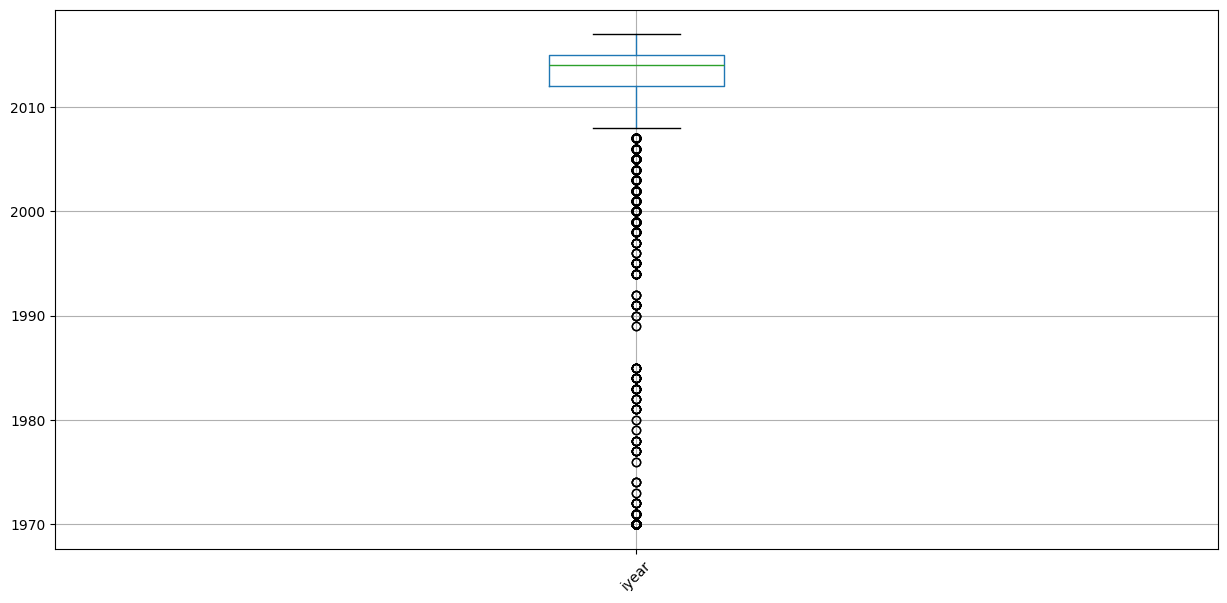

In [22]:
fig = plt.figure(figsize=(15, 7))
boxplot = df.boxplot(column='iyear', rot=45)
plt.show()

#### **Feature Attacks Charts**

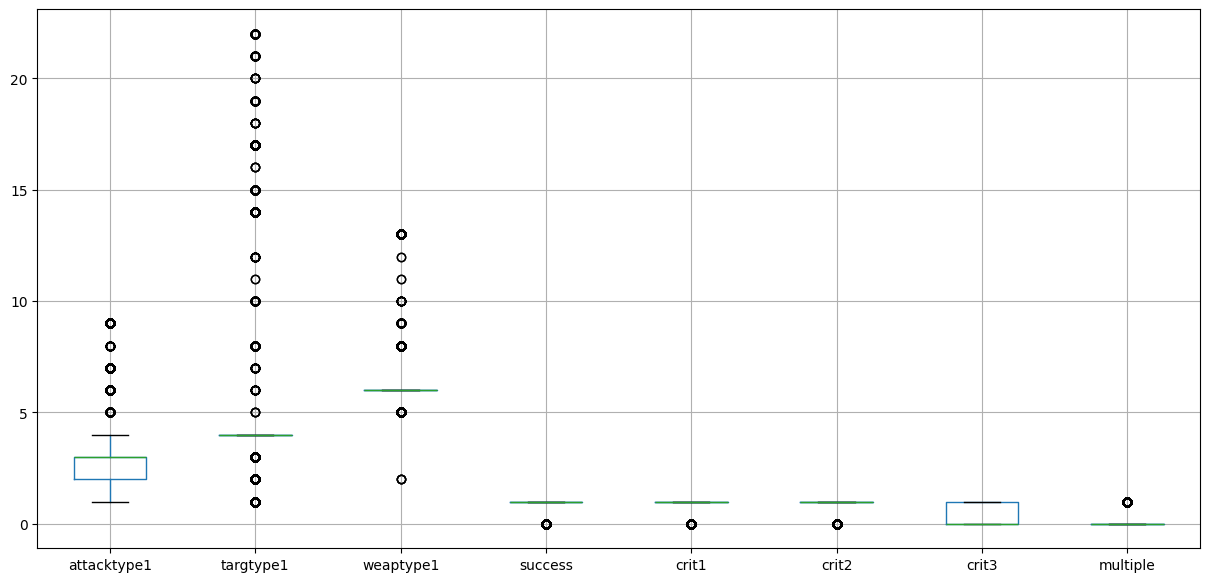

In [23]:
# Crear un boxplot de las columnas seleccionadas
fig = plt.figure(figsize=(15, 7))
boxplot = df.boxplot(column=feature_attack_part_1)
plt.show()

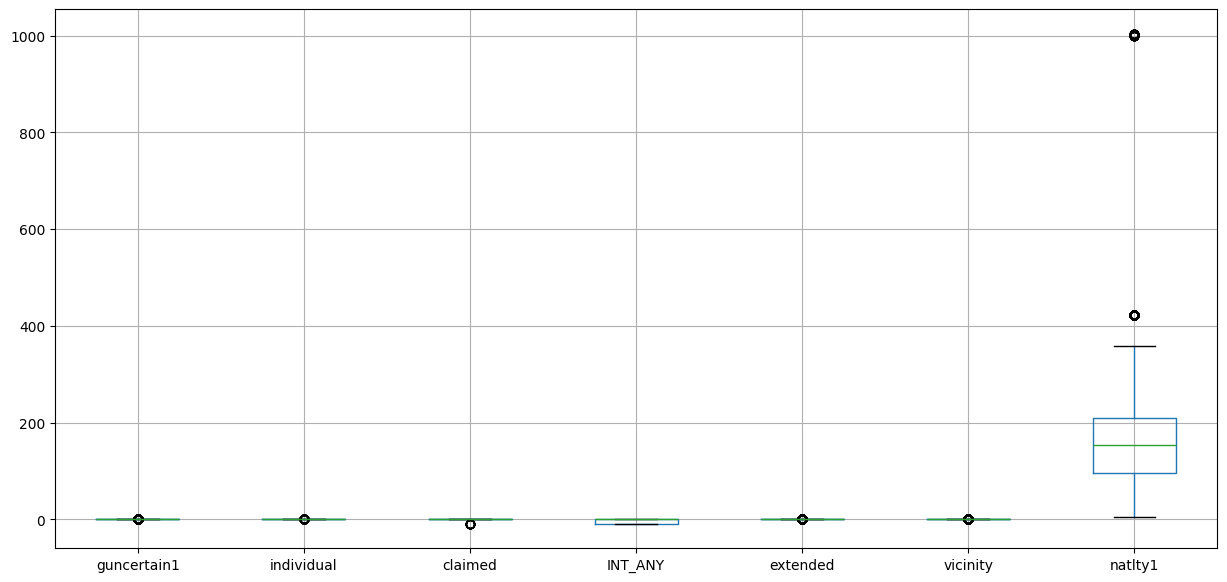

In [24]:
# Crear un boxplot de las columnas seleccionadas
fig = plt.figure(figsize=(15, 7))
boxplot = df.boxplot(column=feature_attack_part_2)
plt.show()

In [25]:
df['claimed'].unique()

array([ 0.,  1., -9.])

El -9 de la columna claimed puede significar que se desconoce si el autor reclamó la responsabilidad del ataque. Podemos observar también valores cercanos al 100 en natlty1, y es porque 999 significa "desconocido" en la mayoría de contextos que se le de, en este caso, en la nacionalidad del objetivo, que significa que la nacionalidad del objetivo es desconocia. Por lo cuál no debemos intervenir estos valores atípicos.

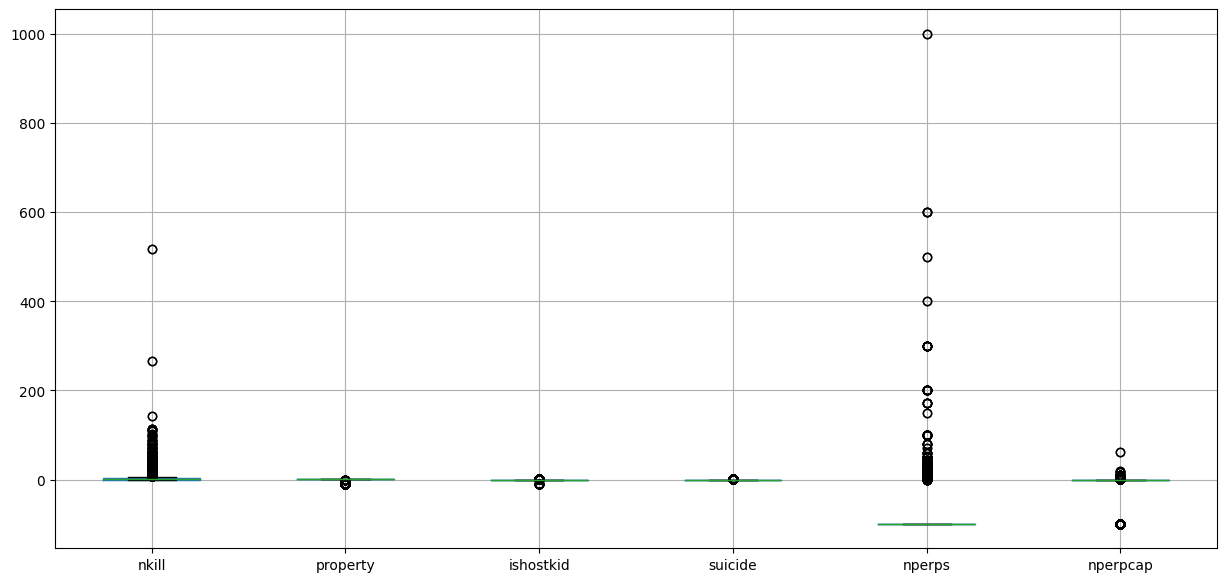

In [26]:
# Crear un boxplot de las columnas seleccionadas
fig = plt.figure(figsize=(15, 7))
boxplot = df.boxplot(column=attack_consequences)
plt.show()

Los valores atipicos en algunas columnas son necesarios, pues poseen diferentes contextos y variables que nos pueden ayudar a ver casos de terrorismos excepcionales

#### **Con lo anterior podemos definir una limpieza efectiva**

## **Df Load**

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8778 entries, 7 to 363372
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   eventid          8778 non-null   int64  
 1   iyear            8778 non-null   int64  
 2   imonth           8778 non-null   int64  
 3   iday             8778 non-null   int64  
 4   extended         8778 non-null   int64  
 5   country_txt      8778 non-null   object 
 6   country          8778 non-null   int64  
 7   region_txt       8778 non-null   object 
 8   region           8778 non-null   int64  
 9   city             8778 non-null   object 
 10  latitude         8778 non-null   float64
 11  longitude        8778 non-null   float64
 12  vicinity         8778 non-null   int64  
 13  crit1            8778 non-null   int64  
 14  crit2            8778 non-null   int64  
 15  crit3            8778 non-null   int64  
 16  doubtterr        8778 non-null   float64
 17  multiple         

In [28]:
create_table(engine, df, 'global_terrorism_db_cleaned')

## **Check**

In [29]:
query = 'SELECT * FROM global_terrorism_db_cleaned'

In [30]:
df_cleaned = pd.read_sql_query(query, engine)
df_cleaned

,eventid,iyear,imonth,iday,extended,country_txt,country,region_txt,region,city,...,nperpcap,claimed,weaptype1_txt,weaptype1,nkill,property,propextent_txt,propextent,ishostkid,INT_ANY
0,197001020002,1970,1,2,0,United States,217,North America,1,Oakland,...,-99.0,0.0,Explosives,6,0.0,1,Minor (likely < $1 million),3.0,0.0,-9
1,197001060001,1970,1,6,0,United States,217,North America,1,Denver,...,-99.0,0.0,Incendiary,8,0.0,1,Minor (likely < $1 million),3.0,0.0,-9
2,197001090002,1970,1,9,0,United States,217,North America,1,Rio Piedras,...,-99.0,1.0,Incendiary,8,0.0,1,Major (likely >= $1 million but < $1 billion),2.0,0.0,0
3,197001250001,1970,1,25,0,United States,217,North America,1,West Point,...,-99.0,0.0,Incendiary,8,0.0,1,Minor (likely < $1 million),3.0,0.0,-9
4,197001280002,1970,1,28,0,United States,217,North America,1,Seattle,...,-99.0,0.0,Explosives,6,0.0,1,Minor (likely < $1 million),3.0,0.0,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8773,201712280004,2017,12,28,0,Egypt,60,Middle East & North Africa,10,Beir al-Abd,...,0.0,1.0,Explosives,6,6.0,1,Unknown,4.0,0.0,0
8774,201712280034,2017,12,28,0,Democratic Republic of the Congo,229,Sub-Saharan Africa,11,Kasindi,...,0.0,0.0,Firearms,5,7.0,1,Unknown,4.0,0.0,0
8775,201712280041,2017,12,28,0,Philippines,160,Southeast Asia,5,Tubaon,...,0.0,1.0,Explosives,6,0.0,1,Unknown,4.0,0.0,0
8776,201712290007,2017,12,28,0,Somalia,182,Sub-Saharan Africa,11,Bulobarde,...,0.0,1.0,Explosives,6,1.0,1,Unknown,4.0,0.0,1


## **EDA cleaned - Multivariate Analysis**

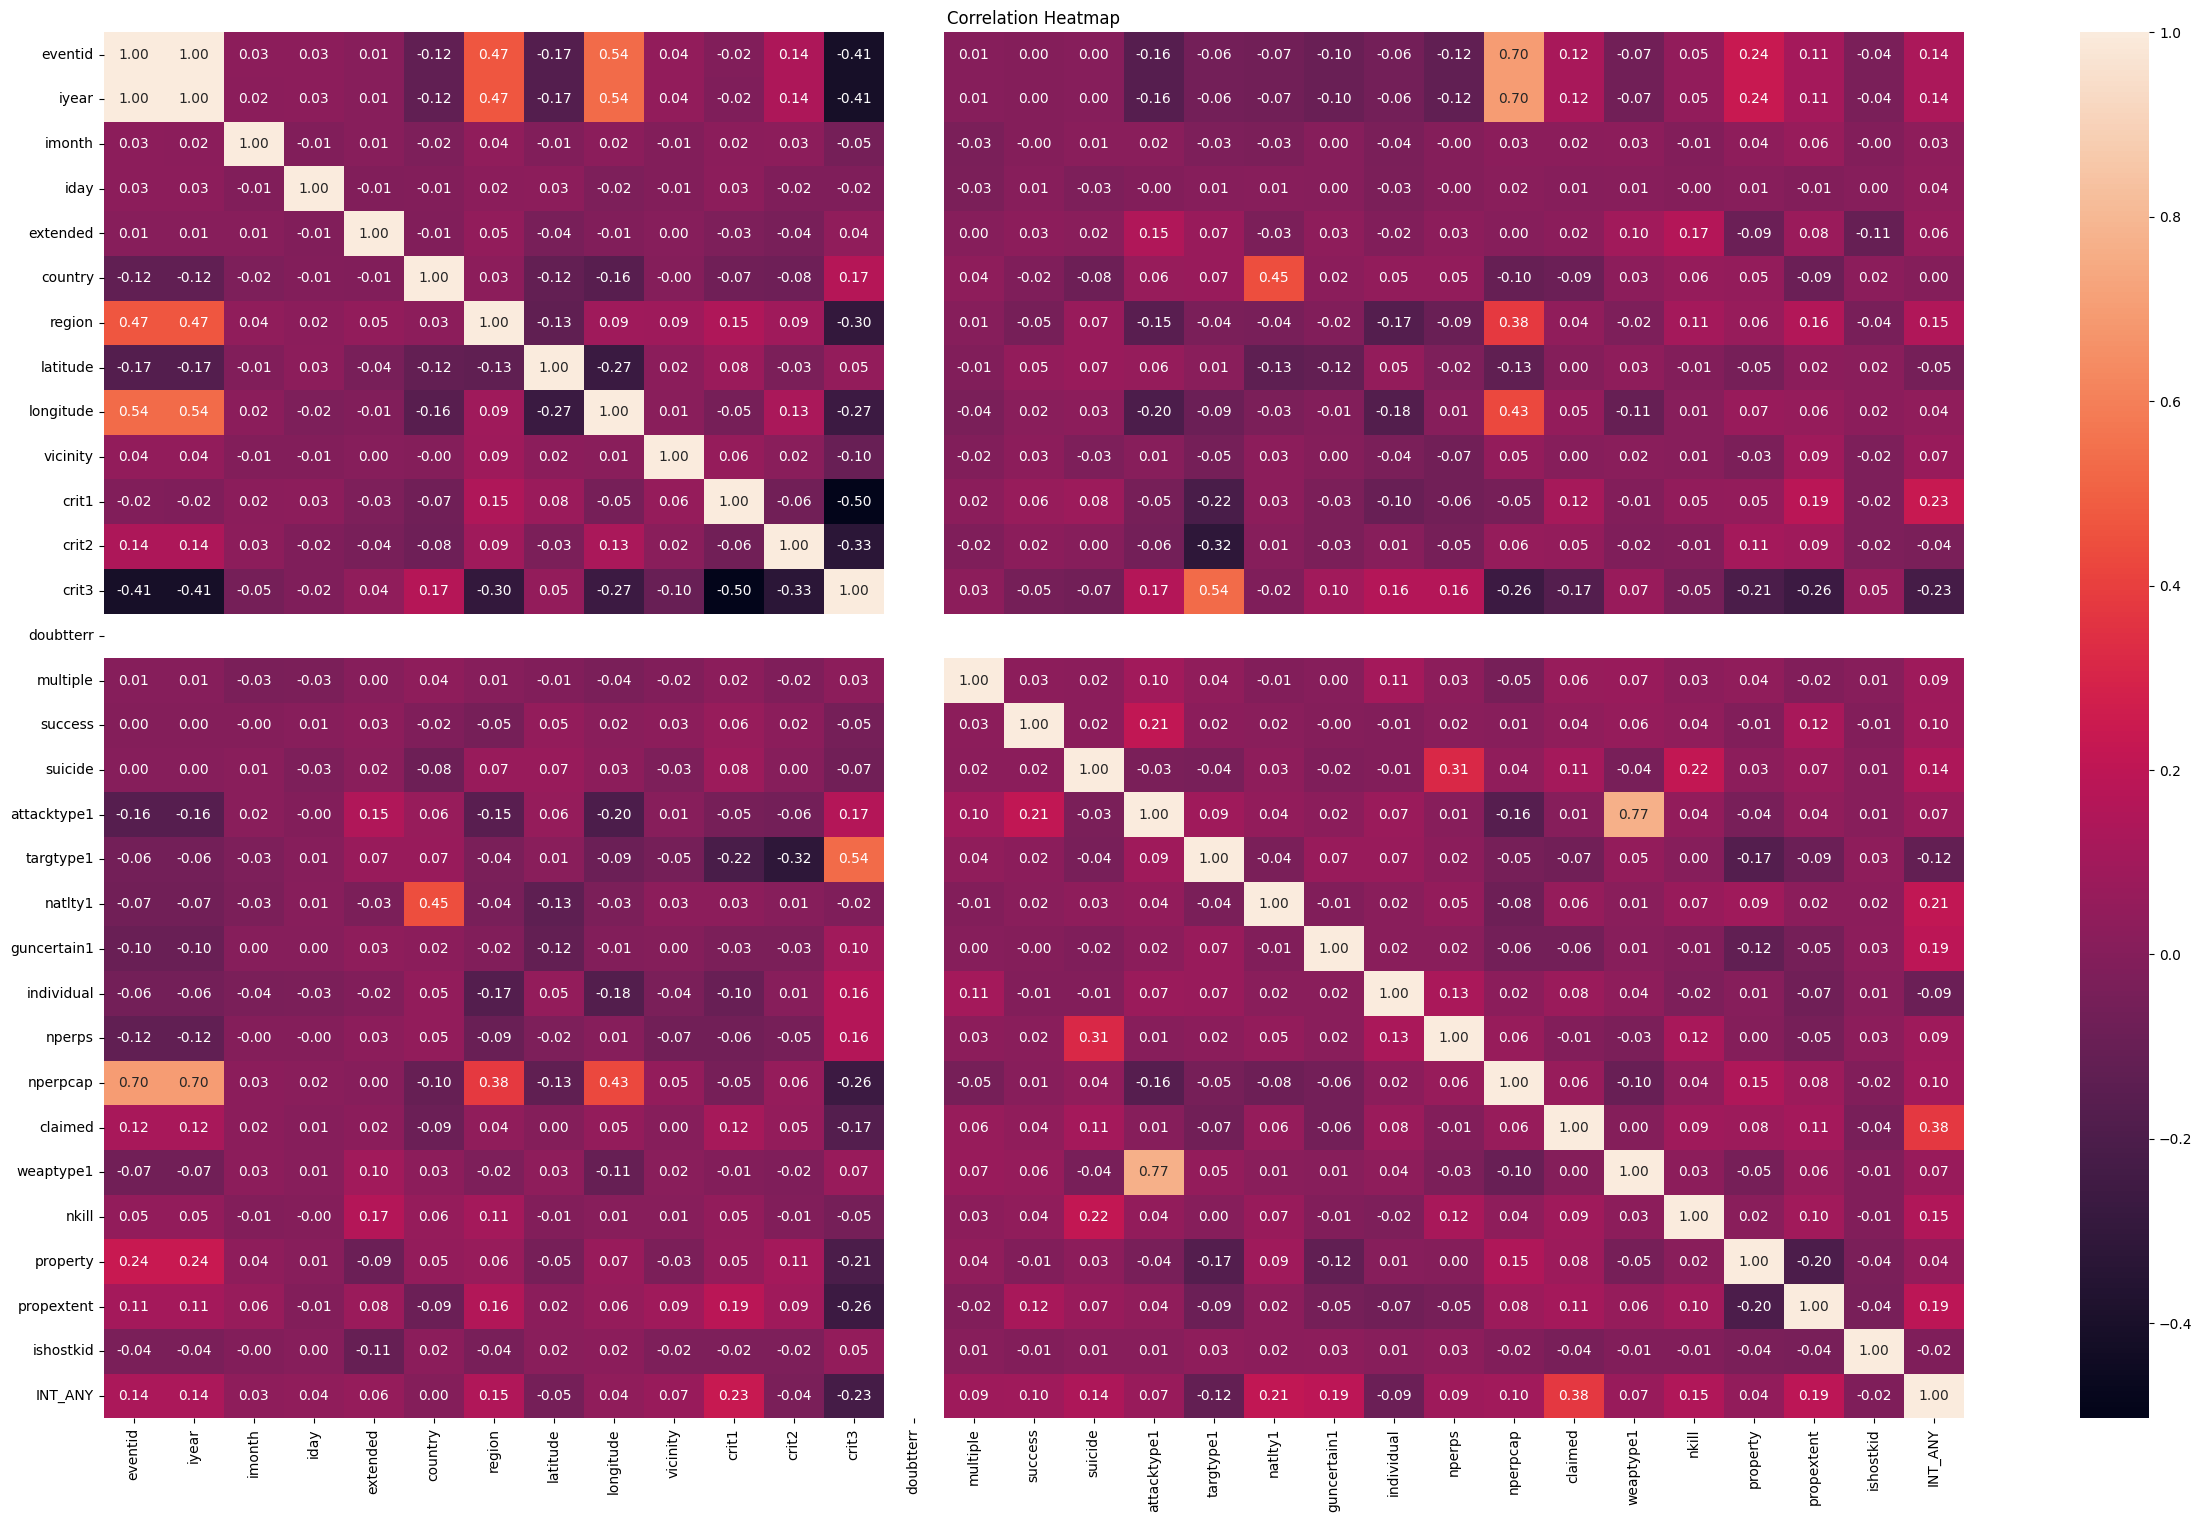

In [36]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(30, 18))

# Using Seaborn to create a heatmap
sns.heatmap(df_cleaned.select_dtypes(include=['int', 'float']).corr(), fmt='.2f', annot=True)

plt.title('Correlation Heatmap')
plt.show()